In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
import pandas as pd 
import numpy as np

In [3]:
df_can = pd.read_csv("Canada.csv")
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.set_index("Country" , inplace = True)

In [5]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
df_can.index.name = None

In [7]:
years = list(map(str , range(1980 , 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Veri Görselleştirme Tarafı

# MathPlot

In [10]:
%matplotlib inline 
import matplotlib as mpl ### Çizim kurallarını belirlediğimiz kütüphane
import matplotlib.pyplot as plt # Pratik olarak çizim yapmak için kullanılıyor , plt fonksiyonları burada

In [11]:
haiti = df_can.loc["Haiti" , years]
haiti.head(5)

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

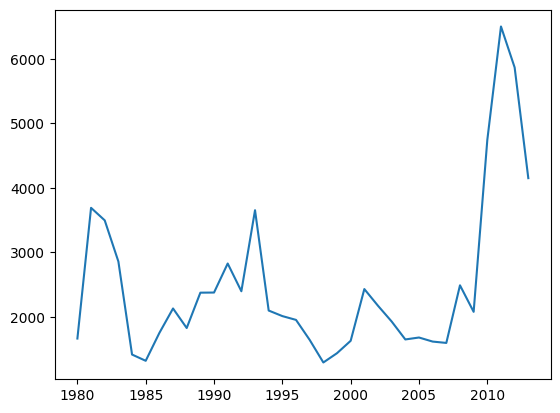

In [12]:
haiti.plot() # Pandas DataFrame otomatik olarak x ve y eksenleri 2 sütunlu frameden çekebilir. 
plt.show()

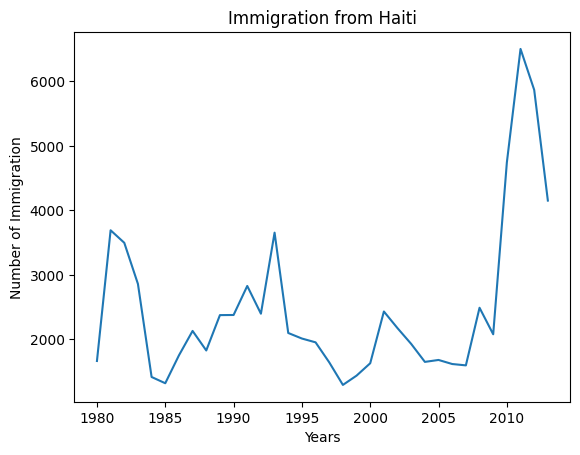

In [13]:
haiti.plot(kind = "line") ## tablo türü 

plt.title("Immigration from Haiti") ## Başlık
# Eksenler
plt.ylabel("Number of Immigration") 
plt.xlabel("Years")

plt.show()

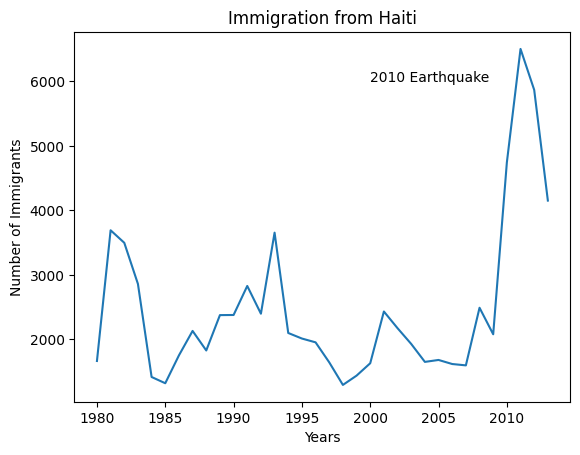

In [14]:
haiti.index = haiti.index.map(int)
haiti.plot(kind = "line")

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake') # Not Eklemek için 

plt.show() 

In [15]:
haiti.index 

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='int64')

# İki Değişken Karşılaştırma

In [17]:
china = df_can.loc["China" , years]

In [18]:
india = df_can.loc["India" , years]

In [19]:
df_CI = pd.concat([china,india])

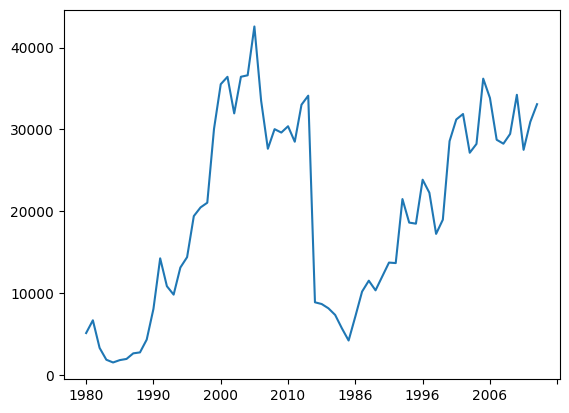

In [20]:
df_CI.plot(kind='line') 
plt.show() ## Bu şekilde yaparsak doğru olmuyor çünkü bir karşılaştırma yok , Transpose lazım

In [21]:
df_CI = df_CI.transpose()

In [22]:
df_CI.head(5)

1980    5123
1981    6682
1982    3308
1983    1863
1984    1527
dtype: object

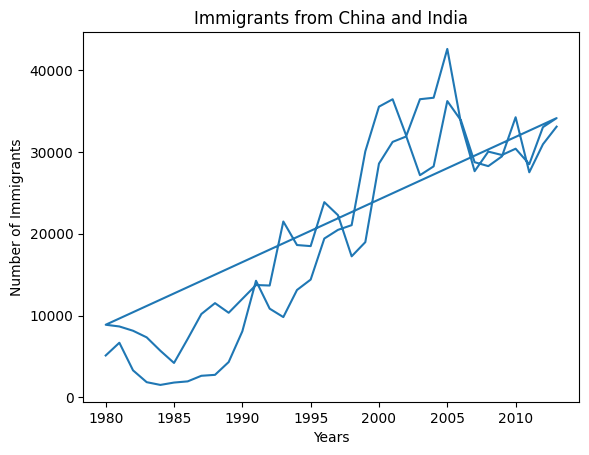

In [23]:
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind = "line")

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Top 5 Ülkenin Karşılaştırılması

In [25]:
df_can.sort_values(by = "Total" , ascending = False , axis = 0 , inplace = True)

In [26]:
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [27]:
df_can.rename(index = {"United Kingdom of Great Britain and Northern Ireland" : "UK"} , inplace = True)

In [28]:
df_can.head(5) ## Yukarıdaki satırda index ismi çok uzun olduğu için kısalttım( bir diziye atayıpda manuel olarakta düzeltilebilir)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [29]:
df_top5 = df_can.head(5)

In [30]:
df_top5.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [31]:
df_top5 = df_top5[years].transpose()

In [32]:
df_top5.head()

,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [33]:
df_top5.index = df_top5.index.map(int)

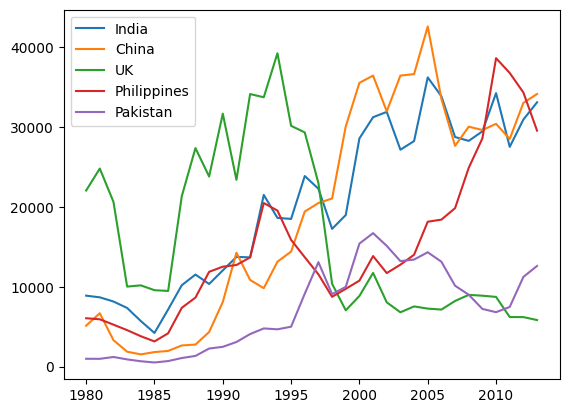

In [34]:
df_top5.plot(kind = "line")
plt.show() 

In [35]:
## Cursorın annesi elimde

### Area Plot 

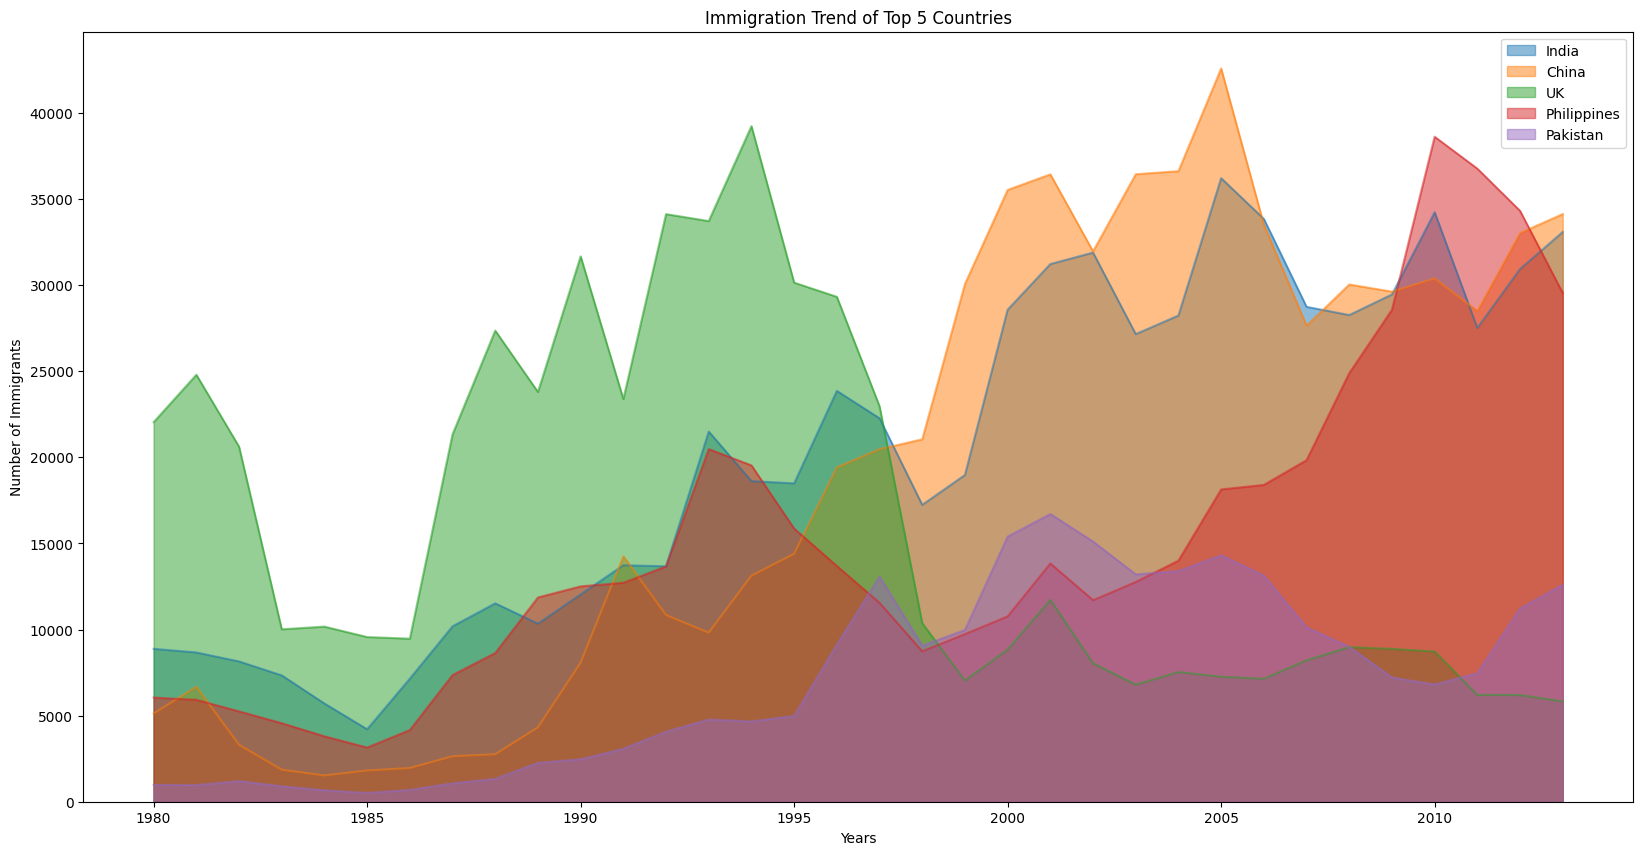

In [37]:
df_top5.plot(kind = "area" ,
             stacked = False , 
             figsize = (20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Area Plot for the lowes immigrations

In [39]:
df_can.sort_values( by = "Total" , ascending = True , axis = 0 ,inplace = True ) 
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [40]:
df_bottom = df_can.head(5)
df_bottom.drop(["Continent","Region","DevName"] ,axis = 1 , inplace = True)
df_bottom = df_bottom.transpose()

C:\Users\semeh\AppData\Local\Temp\ipykernel_11728\3355134672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom.drop(["Continent","Region","DevName"] ,axis = 1 , inplace = True)


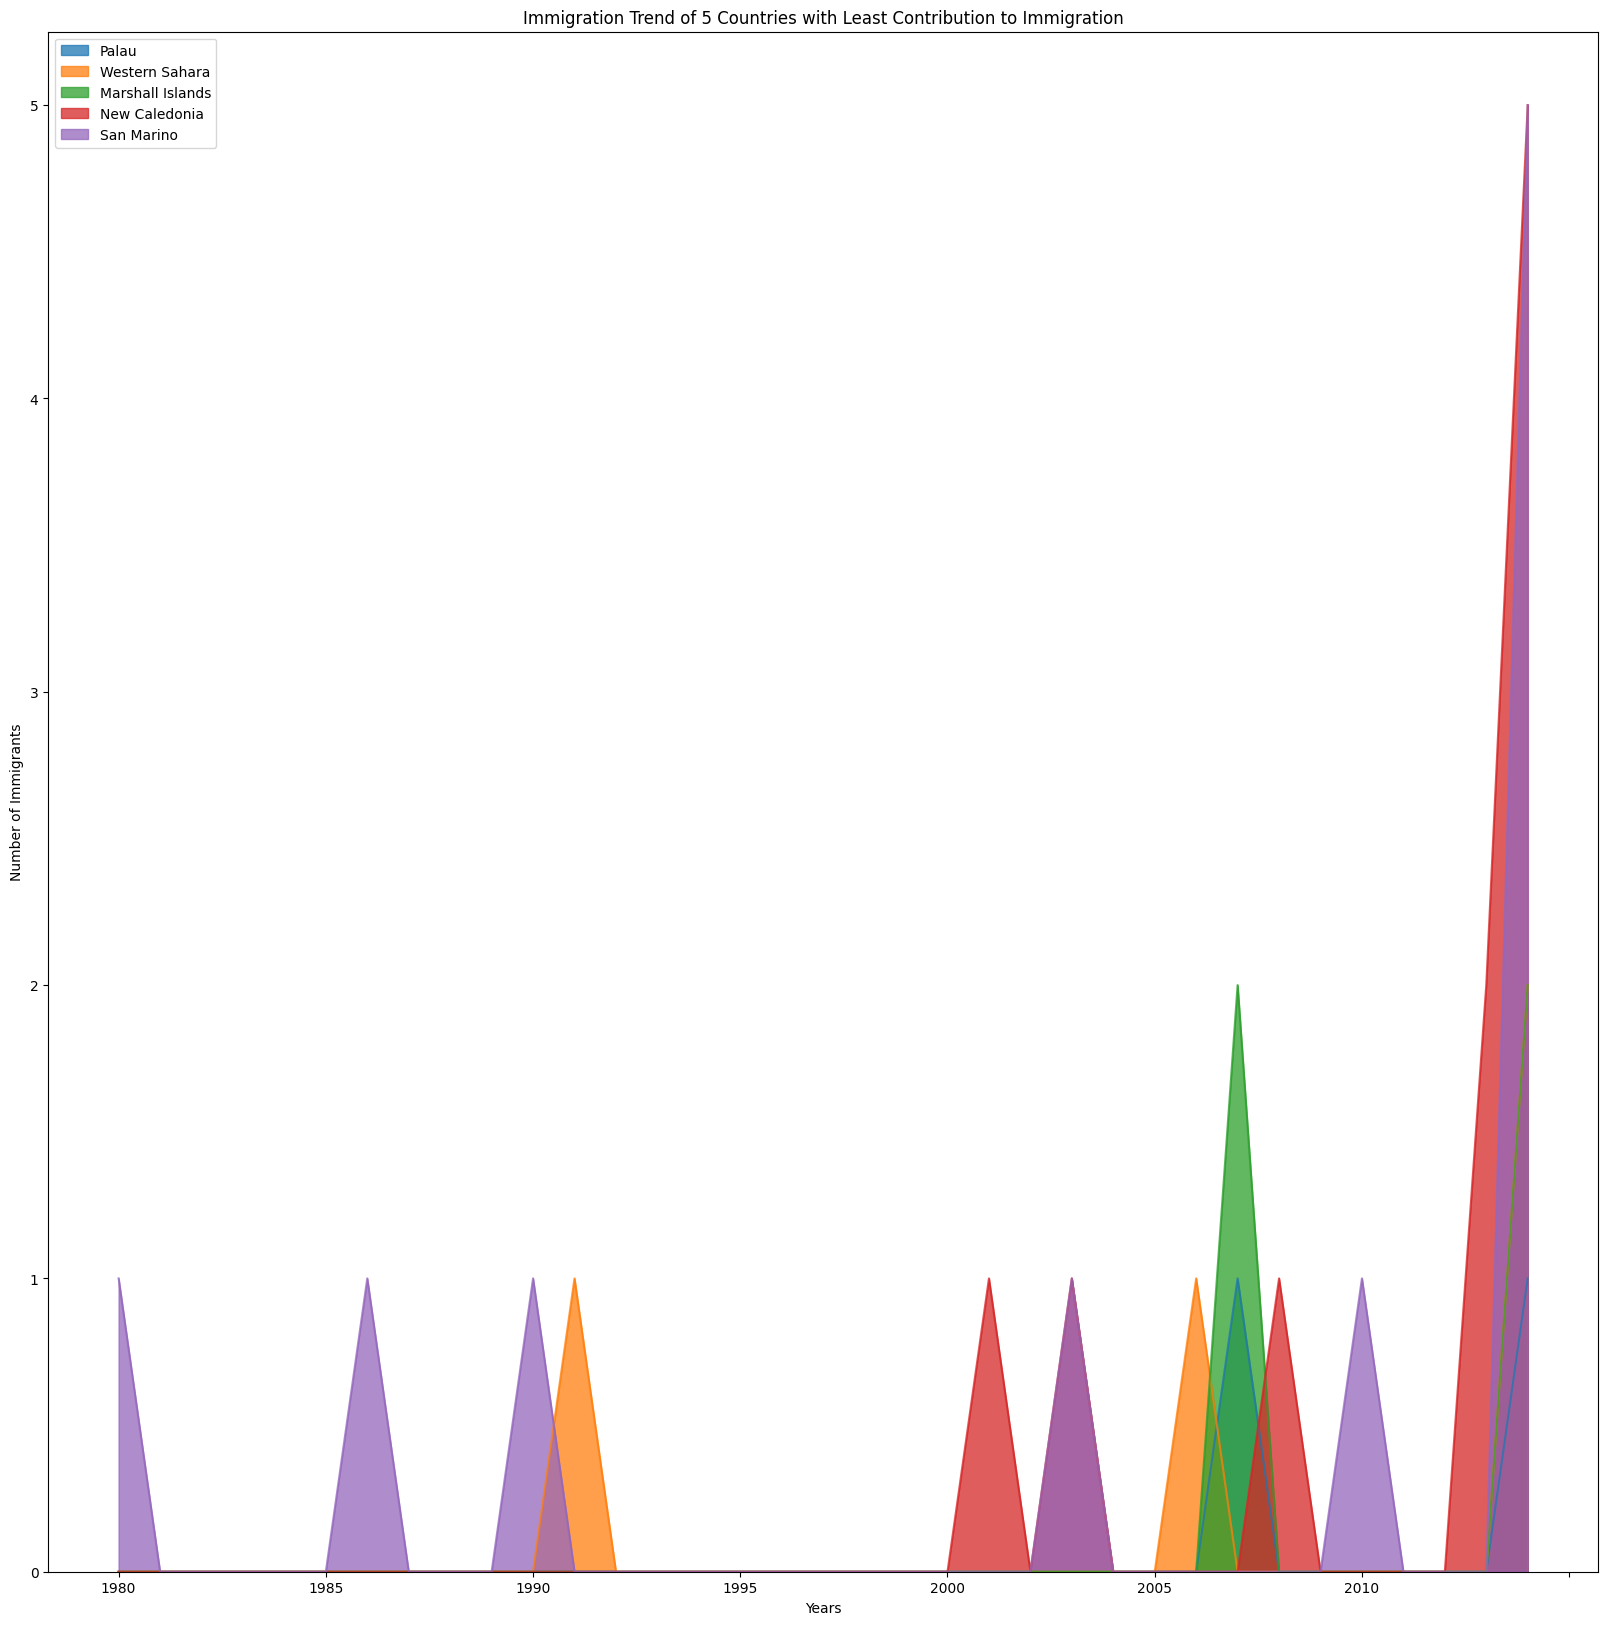

In [41]:
ax = df_bottom.plot(kind = "area" ,alpha = 0.75,stacked = False, figsize = (20,20))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

# Histogram

In [43]:
df_can["2013"].head()

Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [44]:
count , bin_edges = np.histogram(df_can["2013"]) # Bin_edges default 10 

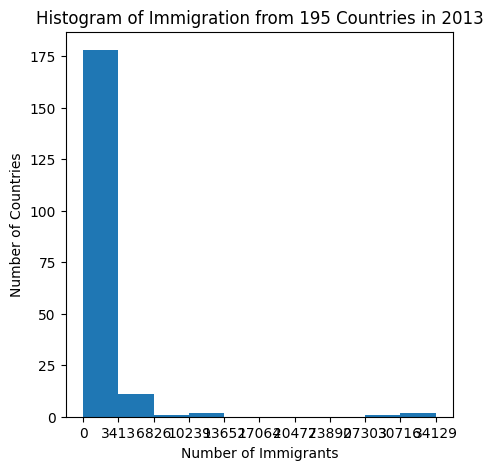

In [45]:
df_can["2013"].plot(kind = "hist" , figsize = (5,5) , xticks = bin_edges) # without xticks , default setting dont u
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()
plt.show()

In [46]:
df_hist = df_can.loc[['Denmark', 'Norway', 'Sweden'] , years]
df_hist = df_hist.transpose()

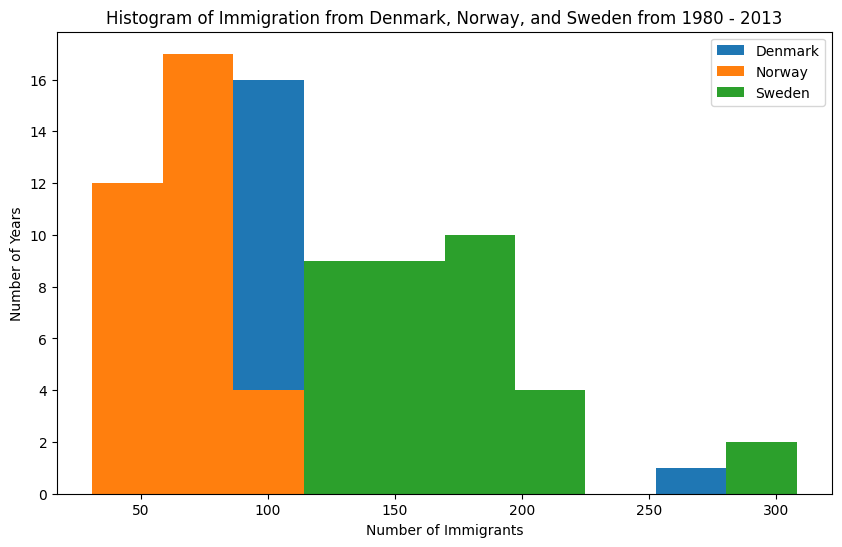

In [47]:
df_hist.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Improvement for HistPlot 

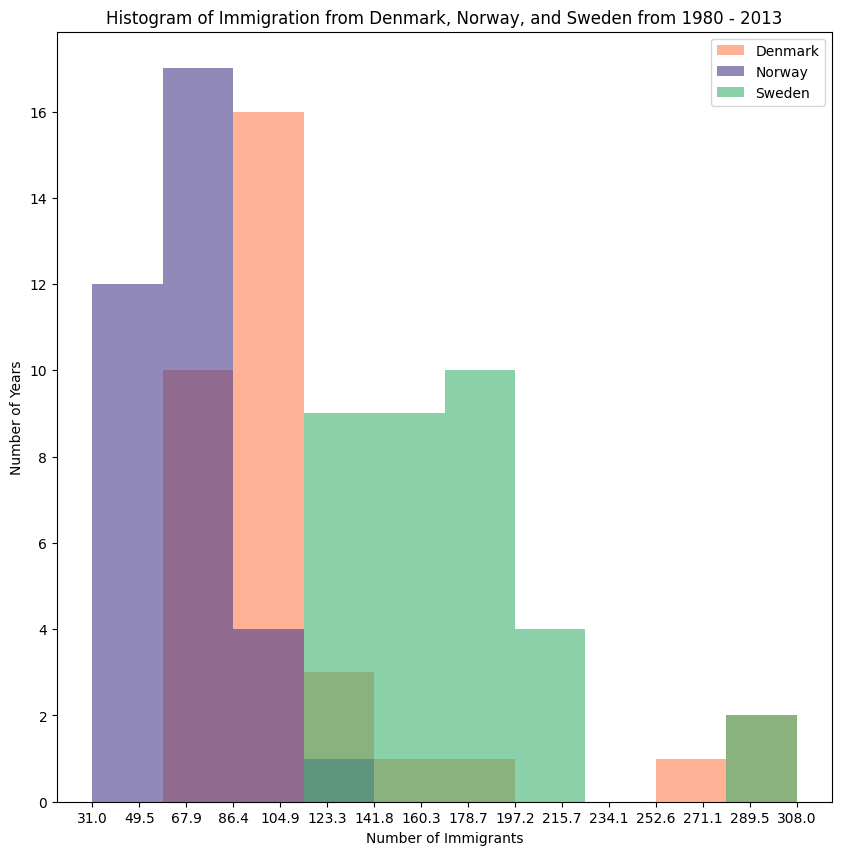

In [49]:
count , bin_edges = np.histogram(df_hist , 15)

df_hist.plot(kind = "hist",
           figsize = (10,10),
           alpha = 0.6,
           xticks = bin_edges,
           color = ['coral', 'darkslateblue', 'mediumseagreen']
           )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### More Improvement :D

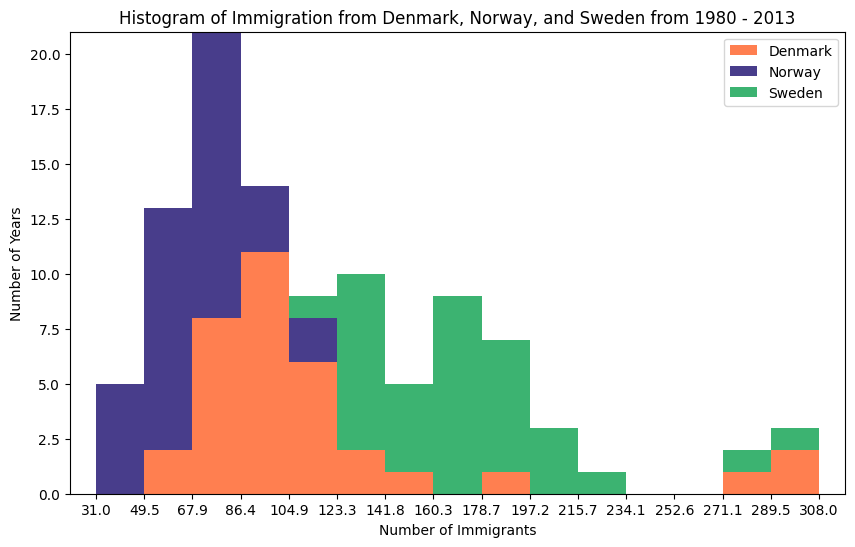

In [106]:
count , bin_edges = np.histogram(df_hist , 15)
x_min = bin_edges[0] - 10
x_max = bin_edges[-1] + 10 

df_hist.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(x_min, x_max)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts

In [124]:
df_iceland = df_can.loc[["Iceland"] , years]
df_iceland = df_iceland.transpose()

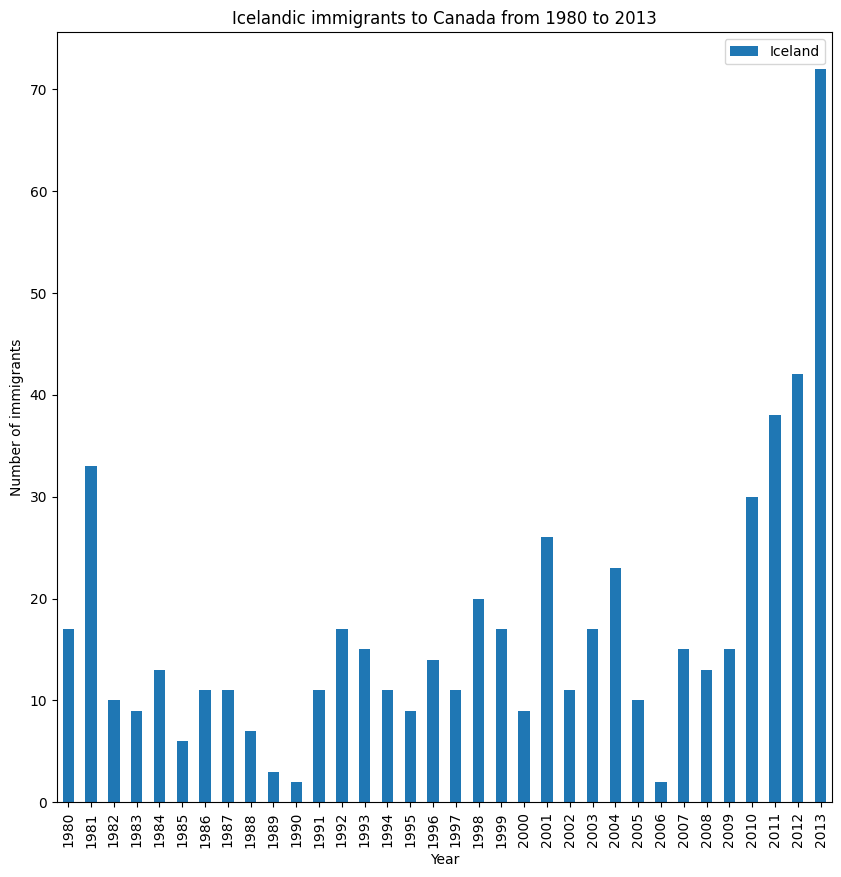

In [126]:
df_iceland.plot(kind = "bar" , figsize = (10,10))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

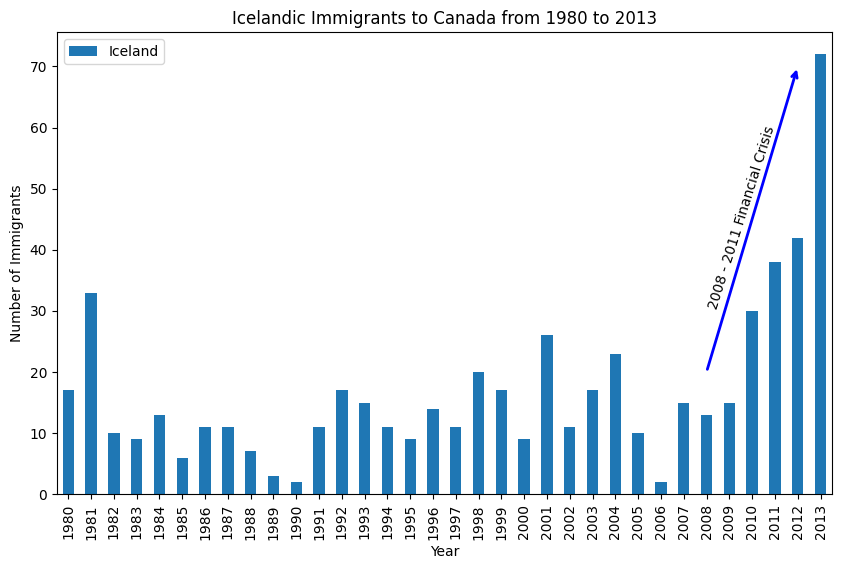

In [132]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [162]:
df_can.sort_values(by = "Total" , ascending = False , axis = 0 , inplace = True)
df_top = df_can.head(15)
df_top.drop(["Continent","Region","DevName"], axis = 1,  inplace = True)
df_top = df_top.transpose()
df_top.head(5)

C:\Users\semeh\AppData\Local\Temp\ipykernel_11728\1352739170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.drop(["Continent","Region","DevName"], axis = 1,  inplace = True)


,India,China,UK,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524


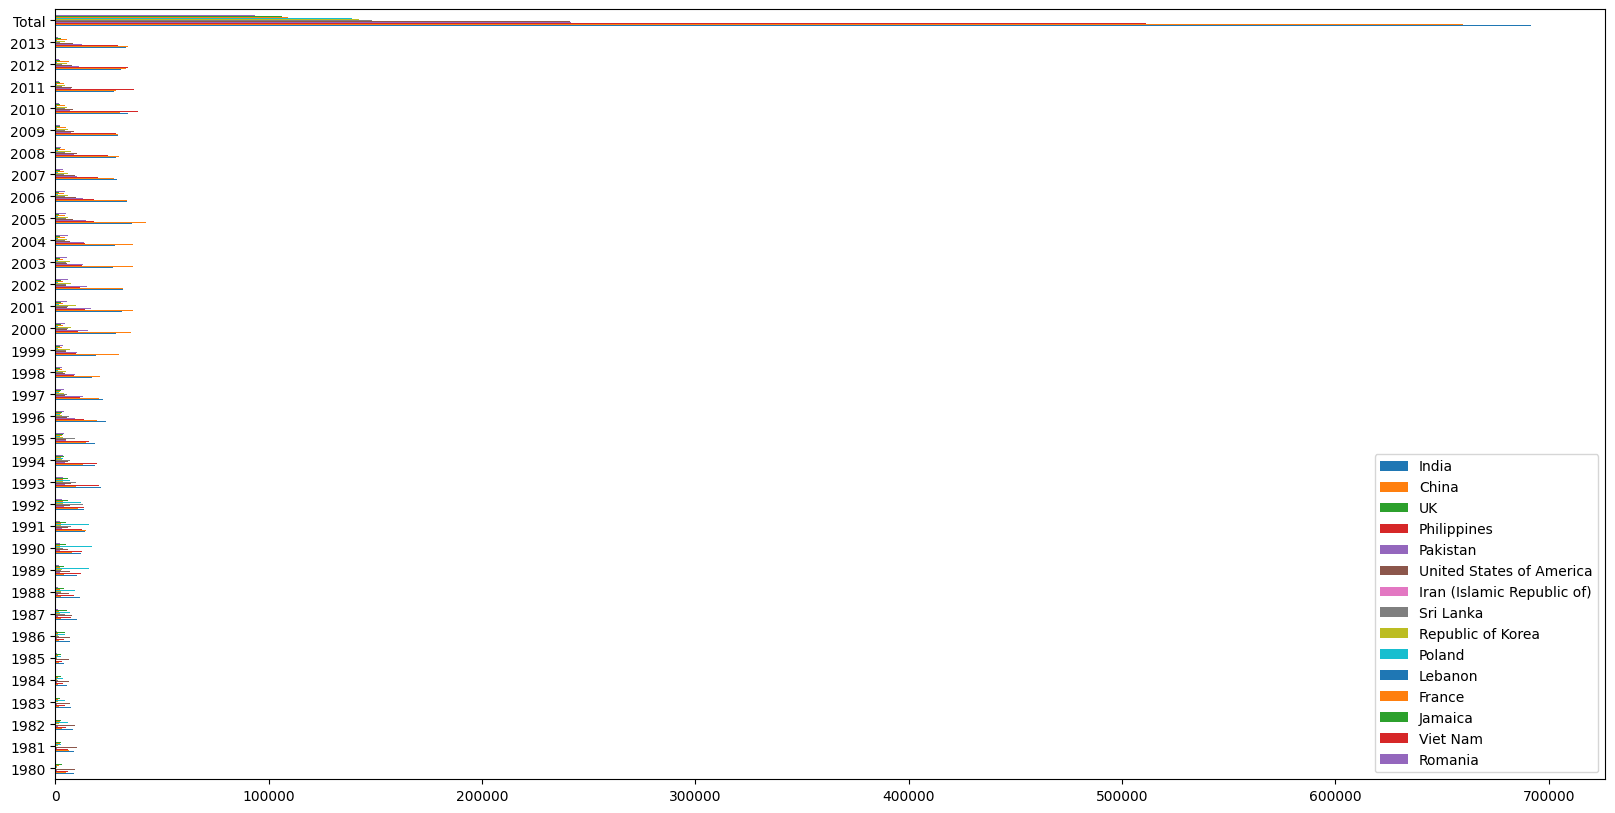

In [166]:
df_top.plot(kind = "barh" , figsize = (20,10))
plt.show()